### Will a Customer Accept the Coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**


This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)

3. Coupon attributes
    - time before it expires: 2 hours or one day

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv('data/coupons.csv')

In [5]:
data.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

## 2. Investigate the dataset for missing or problematic data.

- Car column has problematic values with 12,576 values
- Bar column has problematic values with 107 NaN values
- CoffeeHouse column has problematic values with 217 NaN values
- CarryAway column has problematic values with 151 NaN values
- RestaurantLessThan20 column has problematic values with 130 NaN values
- Restaurant20To50 column has problematic values with 189 NaN values

In [9]:
dt = data
#investigate the missing values using isna with sum
dt.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [10]:
dt.dtypes
#convert the dataframe's values to the appropriate data types
dts = dt.convert_dtypes()
dts.dtypes

destination             string
passanger               string
weather                 string
temperature              Int64
time                    string
coupon                  string
expiration              string
gender                  string
age                     string
maritalStatus           string
has_children             Int64
education               string
occupation              string
income                  string
car                     string
Bar                     string
CoffeeHouse             string
CarryAway               string
RestaurantLessThan20    string
Restaurant20To50        string
toCoupon_GEQ5min         Int64
toCoupon_GEQ15min        Int64
toCoupon_GEQ25min        Int64
direction_same           Int64
direction_opp            Int64
Y                        Int64
dtype: object

In [11]:
#check all values for errors and null values
dts['destination'].value_counts(dropna=False).to_frame()
dts['passanger'].value_counts(dropna=False).to_frame()
dts['weather'].value_counts(dropna=False).to_frame()
dts['temperature'].value_counts(dropna=False).to_frame()
dts['time'].value_counts(dropna=False).to_frame()
dts['coupon'].value_counts(dropna=False).to_frame()
dts['expiration'].value_counts(dropna=False).to_frame()
dts['gender'].value_counts(dropna=False).to_frame()
dts['age'].value_counts(dropna=False).to_frame()
dts['maritalStatus'].value_counts(dropna=False).to_frame()
dts['has_children'].value_counts(dropna=False).to_frame()
dts['education'].value_counts(dropna=False).to_frame()
dts['occupation'].value_counts(dropna=False).to_frame()
dts['income'].value_counts(dropna=False).to_frame()


dts["car"].value_counts(dropna=False)
dts['Bar'].value_counts(dropna=False)
dts['CoffeeHouse'].value_counts(dropna=False)
dts['CarryAway'].value_counts(dropna=False)
dts['RestaurantLessThan20'].value_counts(dropna=False)
dts['Restaurant20To50'].value_counts(dropna=False)
dts['toCoupon_GEQ5min'].value_counts(dropna=False)
dts['toCoupon_GEQ15min'].value_counts(dropna=False)
dts['toCoupon_GEQ25min'].value_counts(dropna=False)
dts['direction_same'].value_counts(dropna=False)
dts['direction_opp'].value_counts(dropna=False)
dts['Y'].value_counts(dropna=False)


dts['destination'].value_counts(dropna=False)
dts['passanger'].value_counts(dropna=False)

# dts['destination'].isnull().sum()


# problematic data with a lot of NaN 12,576 values
dts['car'].value_counts(dropna=False).to_frame()

#problematic data with 107 NaN walues
dts['Bar'].value_counts(dropna=False).to_frame()

#problematic data with 217 NaN walues
dts['CoffeeHouse'].value_counts(dropna=False).to_frame()

#problematic data with 151 NaN walues
dts['CarryAway'].value_counts(dropna=False).to_frame()

#problematic data with 130 NaN walues
dts['RestaurantLessThan20'].value_counts(dropna=False)

#problematic data with 189 NaN walues
dts['Restaurant20To50'].value_counts(dropna=False)

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
NaN       189
Name: Restaurant20To50, dtype: Int64

In [12]:
dt.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0


## 3. Decide what to do about your missing data -- drop, replace, other...
- The Car column has a lot of problematic missing values. Because of the volume of missing values, this column can be replaced by using other statistical values derived from other portion of the whole dataset
- Bar column has only 107 missing values hence, these values can be dropped
- CoffeeHouse column has only 217 missing values hence these values can be dropped
- CarryAway column has only 151 missing values, hence these values can be dropped
- RestaurantLessThan20 column has only 130 missing values, hence these values can be dropped
- Restaurant20To50 column has only 189 values, hence these values can be dropped

In [102]:
#initialize the proportion of the total observation who accepted the coupon
portion_accepted = 0

## 4. What proportion of the total observations chose to accept the coupon? 
- 56.86% is the proportion of the total observations that accepted the coupon {portion_accepted = 0.5684326710816777}

In [103]:
#filter out those who accepted the coupon and groupby the appropriate column
number_accepted = dt.query("Y == 1").groupby("Y")["Y"].size()

#get the total population
total_population = len(dt.index)

#calculate the percentage of the acceptance
portion_accepted = (number_accepted / total_population)[1]
portion_accepted

#get the normalized count of the those who accepted the coupons
val = dts["Y"].value_counts(normalize=True)[1]

#verify that the values match
if portion_accepted == val:
   print(portion_accepted)

0.5684326710816777


## 5. Use a bar plot to visualize the `coupon` column.

Coffee House             0.315043
Restaurant(<20)          0.219647
Carry out & Take away    0.188663
Bar                      0.159019
Restaurant(20-50)        0.117629
Name: coupon, dtype: float64

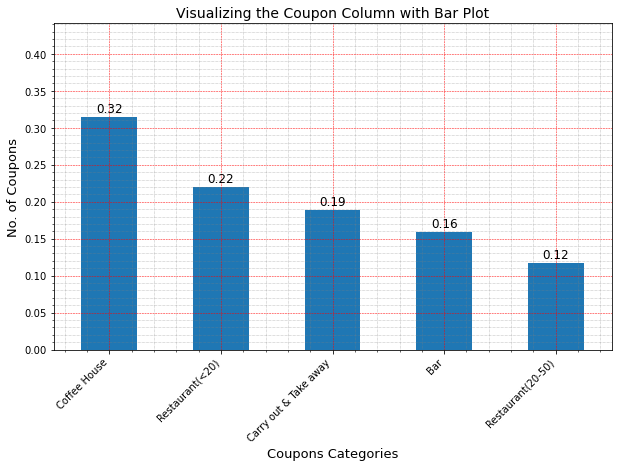

In [104]:
#get the dataframe of the coupon column
coupons = dt.groupby("coupon").size()

#get the normalized dataframe of the coupon column
coupons = dt["coupon"].value_counts(normalize=True)

#plot the barplot of the coupons normalized groups
fig = coupons.plot(kind='bar', figsize=(10,6))

#label the bars in the bar plot
for index,value in enumerate(coupons):
    fig.annotate(format(value, '.2f'),
                   (index, value), 
                    ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')

#set the rotation of the xlabels and the margins
plt.xticks(rotation=45, ha='right')
fig.margins(0.4)

#add minor and major ticks
fig.minorticks_on()
fig.grid(which='major', linestyle='--', linewidth='0.5', color='red')
fig.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

#add the labels and title
fig.set_ylabel("No. of Coupons", fontsize=13)
fig.set_xlabel('Coupons Categories', fontsize=13)
fig.set_title(f"Visualizing the Coupon Column with Bar Plot", fontsize=14)
coupons

## 6. Use a histogram to visualize the temperature column.

In [16]:
#get the categories of the temperature column and the normalized value
temp_value = dts["temperature"].value_counts().to_frame()
temp_percent = dts["temperature"].value_counts(normalize=True).to_frame().reset_index()

#get the normal value and convert the values to numberic, float data
temp_value = pd.to_numeric(temp_value["temperature"],  downcast='float').to_frame().reset_index()

#merget the real values and the normalized value dataframes
temp_final = temp_value.merge(temp_percent, left_on='index', right_on='index')

#
temp_final.dtypes
temp_final

,index,temperature_x,temperature_y
0,80,6528.0,0.514664
1,55,3840.0,0.302744
2,30,2316.0,0.182592


80    0.514664
55    0.302744
30    0.182592
Name: temperature, dtype: Float64

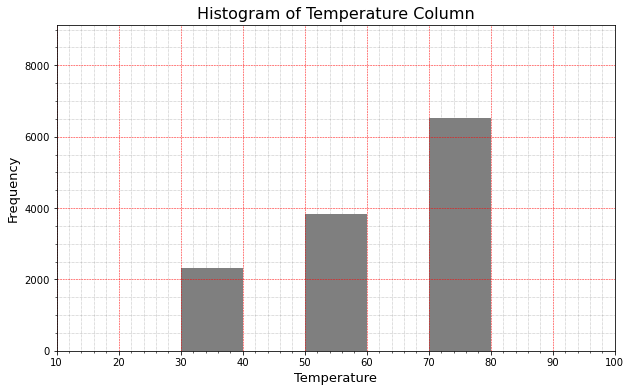

In [105]:
import plotly.express as px
import matplotlib.pyplot as plt


#using a histogram to visualize the temperature column
#get the temperature column
temp_val = dts["temperature"]
temp_val

num_bins = 5
#fig = plt.hist(temp_val.sort_values(ascending=False), num_bins, facecolor='blue', alpha=0.5)

plt.figure(figsize=(10,6))

plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

plt.margins(0.4)

fig = temp_val.hist(bins=num_bins, alpha=0.5, color='k')

fig.set_ylabel("Frequency", fontsize=13)
fig.set_xlabel('Temperature', fontsize=13)
fig.set_title(r'Histogram of Temperature Column', size=16)
    
temp_val.value_counts(normalize=True)


Text(0.5, 1.0, 'Seaborn version of Histogram of Temperature Column')

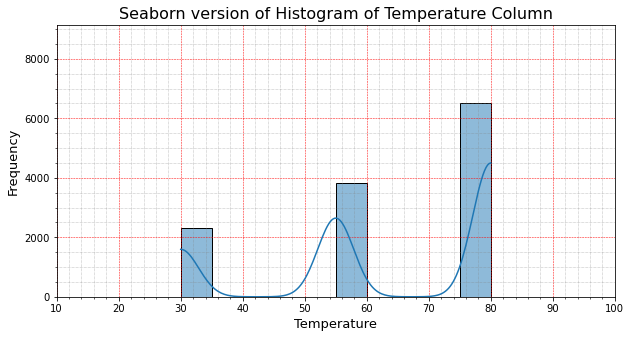

In [95]:
#plot the same graph above using seaborn

#set the values to the appropriate header formats
_temp_val = temp_val
_temp_val = temp_val_.reset_index()
_temp_val.set_index("level_0")

#plot the bar plot
plt.figure(figsize = (10,5))
fig = sns.histplot(data=_temp_val, x="temperature", binwidth=5, kde=True)

#set the major and minor ticks
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.margins(0.4)

#set the labels and title
fig.set_ylabel("Frequency", fontsize=13)
fig.set_xlabel('Temperature', fontsize=13)
fig.set_title(r'Seaborn version of Histogram of Temperature Column', size=16)


## **Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

### 1. Create a new `DataFrame` that contains just the bar coupons.


In [106]:
#df_bar_coupons = dts.groupby("coupon").size()
#get the dataframe that contains just the bar coupons
df_bar_coupons = dts.query("coupon == 'Bar'")
df_bar_coupons.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,<NA>,never,never,<NA>,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,<NA>,never,never,<NA>,4~8,1~3,1,0,0,1,0,1


### 2. What proportion of bar coupons were accepted?
- 41% of Bar Coupons were accepted

Text(0.5, 1.0, 'Proportion of Bar Coupons That Were Accepted')

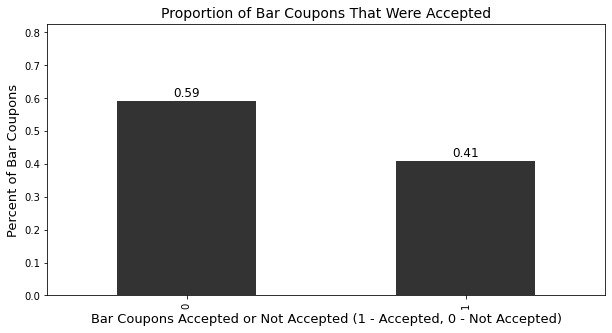

In [107]:
#df_bar_accepted
#get the coupons that were accepted
df_bar_coupons_accepted = df_bar_coupons['Y'].value_counts(normalize=True)

#plot the bar plot
fig = df_bar_coupons_accepted.plot(kind='bar', figsize=(10,5), color='k', alpha=0.8)

#set the margins
plt.margins(0.4)

#label the bars in the bar plot
for index,value in enumerate(df_bar_coupons_accepted):
    fig.annotate(format(value, '.2f'),
                   (index, value), 
                    ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')

#label the axis and the title
fig.set_ylabel("Percent of Bar Coupons", fontsize=13)
fig.set_xlabel('Bar Coupons Accepted or Not Accepted (1 - Accepted, 0 - Not Accepted)', fontsize=13)
fig.set_title(f"Proportion of Bar Coupons That Were Accepted", fontsize=14)

### 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.
- 81% acceptance rate among people who went to a bar 3 or fewer times a month
- 19% acceptance rate among people who went to a bar more times within a month

Text(0.5, 1.0, 'Acceptance rate Between Fewer Than 3 visitors and the rest')

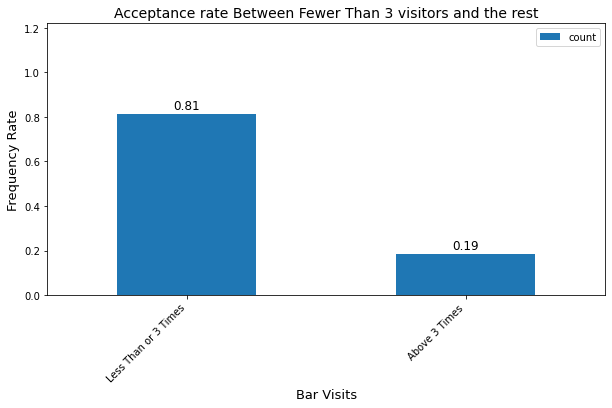

In [65]:
#get bar coupons only
df_bar_coupons = dts.query("coupon == 'Bar'") 

#convert to appropriate data types
df_bar_coupons.convert_dtypes().dtypes

#get only accepted bar coupons
df_accepted_bar_coupons = df_bar_coupons.loc[df_bar_coupons["Y"] == 1]
df_accepted_bar_coupons

#remove null values
df_accepted_bar_coupons["Bar"].value_counts(dropna=False)

df_accepted_bar_coupons2 = df_accepted_bar_coupons[df_accepted_bar_coupons["Bar"].notna()]
df_accepted_bar_coupons2["Bar"].value_counts(dropna=False)



#compare acceptance rate between those who went to bar 3 or fewer times a month
#to those who went more.
df_bar_coupons_3_or_fewer = df_accepted_bar_coupons2.query("Bar == '1~3'")
df_bar_coupons_less1 = df_accepted_bar_coupons2.query("Bar == 'less1'")
df_bar_coupons_never = df_accepted_bar_coupons2.query("Bar == 'never'")
df_bar_coupons_4to8 = df_accepted_bar_coupons2.query("Bar == '4~8'")
df_bar_coupons_gt8 = df_accepted_bar_coupons2.query("Bar == 'gt8'")

#acceptance rate between those who went to bar 3 or fewer times a month
df_bar_coupons_3orfewer_total = df_bar_coupons_3_or_fewer.append(df_bar_coupons_less1).append(df_bar_coupons_never)

#acceptance rate between those who went to bar more times a month
df_bar_coupons_higherthan3_total = df_bar_coupons_4to8.append(df_bar_coupons_gt8)

#count of those who went to bar 3 or fewer times a month
three_or_fewer = df_bar_coupons_3orfewer_total["Bar"].count()

#count of those who went to bar more times a month
above3 = df_bar_coupons_higherthan3_total["coupon"].count()

#total of the counts above
total = three_or_fewer + above3

#percentage of those who went to bar 3 or fewer times a month
three_or_fewer_rate = three_or_fewer/total

#percentage of those who went to bar more times a month
above3_rate = above3/total

#create a data and the dataframe of the percentages
visit_data = {
    "category": ["Less Than or 3 Times","Above 3 Times"],
    "count": [three_or_fewer_rate,above3_rate]
}
bar_visits = pd.DataFrame(visit_data).reset_index()

#reset columns and set index
bar_visits.columns = ["index", "category", "count"]
bar_visits = bar_visits[["category", "count"]]
bar_visits.set_index("category")


#create the matplotlib of the bar plot
fig = bar_visits.plot.bar(x="category", figsize=(10,5))

#set margins and rotation of the x axis labels
plt.margins(0.5)
plt.xticks(rotation=45, ha='right')

for index,value in enumerate(bar_visits["count"]):
    fig.annotate(format(value, '.2f'),
                   (index, value), 
                    ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')

#create the labels and plot title       
fig.set_ylabel("Frequency Rate", fontsize=13)
fig.set_xlabel('Bar Visits', fontsize=13)
fig.set_title(f"Acceptance rate Between Fewer Than 3 visitors and the rest", fontsize=14)

### 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?
- There is a huge difference of 235 between drivers who go to a bar more than once a month and over the age of 25 to the all others
- 292 drivers above the age of 25 visit a bar more than once a month while 527 visit less than once
- 36% acceptance rate by drivers who visit more than once
- 64% acceptance rate by all others
- There is a difference of 235 which is a normalized 28%

Text(0.5, 1.0, 'Plot of Drivers above 25 with more than one visits vs Everyone Else')

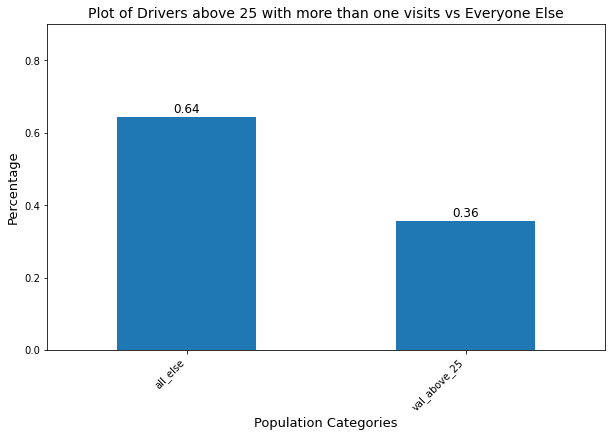

In [96]:
#function to convert 50plus values in the age column to 50
def convert_to50(val):
    new_val = 50
    
    if val == "50plus":
        return new_val
    else:
        return val
    
#function to convert below21 values in the age column to 20
def convert_to20(val):
    new_val = 20
    
    if val == "below21":
        return new_val
    else:
        return val
    

#convert 50plus and below 21 to 50 and 20 respectively
dts["age"] = dts["age"].apply(convert_to50)
dts["age"] = dts["age"].apply(convert_to20)



#convert age column to numeric
dts["age"] = pd.to_numeric(dts["age"])




#get all the Bar coupons
df_barcoupons = dts.query("coupon == 'Bar'")

#get the accepted bar coupons
df_barcoupons_accepted = df_barcoupons.loc[df_barcoupons["Y"] == 1]



#function to create separate drivers above the age 25 and visited a bar more than once a month and all else
def iter_df_barcoupons_accepted(df):
    filters = ["1~3","4~8","gt8"]
    df["visits_25"] = np.NaN
    
    for idx, row in df.iterrows():
        if  df.loc[idx,'age'] > 25 and df.loc[idx,'Bar'] in filters:
            df.loc[idx,'visits_25'] = "val_above_25"
        else:
            df.loc[idx,'visits_25'] = "all_else"
            
    return df


#select only non-empty fields
df_barcoupons_accepted = df_barcoupons_accepted[df_barcoupons_accepted["Bar"].notna()]

df_barcoupons_accepted2 = iter_df_barcoupons_accepted(df_barcoupons_accepted)

#assign the groups to a variable
bar_visits_above25 = df_barcoupons_accepted2["visits_25"].value_counts(dropna=False, normalize=True)

#plot the variable
fig = bar_visits_above25.plot.bar(figsize=(10,6))

#assign margin to the plot and rotate the x-axis ticks
plt.margins(0.4)
plt.xticks(rotation=45, ha='right')

#label the bars in the bar plot
for index,value in enumerate(bar_visits_above25):
    fig.annotate(format(value, '.2f'),
                   (index, value), 
                    ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')

#Set the labels and the title of the bar plot
fig.set_ylabel("Percentage", fontsize=13)
fig.set_xlabel('Population Categories', fontsize=13)
fig.set_title(f"Plot of Drivers above 25 with more than one visits vs Everyone Else", fontsize=14)

#bar_visits_separated = df_barcoupons_accepted["visits_25 == 'drivers_above25'"]
#bar_visits_separated




### 5. Construct a null and alternative hypothesis for the difference between groups of drivers who go to a bar more than once a month and are over the age of 25 to all other drivers. 

### Null Hypothesis
- H0: Probability of going to bar being above 25 years of age and being less than 25 years are equal i.e.μ1 = μ2, 


### Alternative Hypothesis
- H1: Probability of going to bar being above 25 years of age and being less than 25 years are not equal i.e.μ1 ≠ μ2, 


### 6. Using alpha at 0.05 test your hypothesis and state your conclusion.

In [45]:
df_barcoupons_accepted2
#get the sample of bar coupons of drivers who go to a bar more than once and are above age of 25
above_25 = df_barcoupons_accepted2.query("visits_25 == 'val_above_25'")["age"].head(200)

#get the sample of bar couponse of all else
all_else = df_barcoupons_accepted2.query("visits_25 == 'all_else'")["age"].head(200)

In [46]:
from scipy import stats


alpha = 0.05


t_value,p_value=stats.ttest_ind(above_25,all_else)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))
print('p-value for two tailed test is %f'%p_value)

if p_value<=alpha:

    print('Conclusion','n','Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that 
    the Probability of going to bar being above 25 years of age and being less than 25 years are not equal i.e., 
    μ1 ≠ μ2 at %.2f level of significance.'''%alpha)

else:

    print('Conclusion','n','Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0.''')



Test statistic is 5.087370
p-value for two tailed test is 0.000001
Conclusion n Since p-value(=0.000001) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that 
    the Probability of going to bar being above 25 years of age and being less than 25 years are not equal i.e., 
    μ1 ≠ μ2 at 0.05 level of significance.


### 7. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 

### Solution
- There is a huge difference of 33 between drivers who go to a bar more than once a month and had passengers that were not kids and had occupations other than farming, fishing or forestry and all others
- 426 drivers go to bar more than once a month, had passengers not kids and occupation other than farming, fishing, or forestry
- 393 drivers are all others
- 52% acceptance rate by the first category
- 48% acceptance rate by all others
- There is a difference of 14%


bar_pass_occu_neg    0.520147
bar_pass_occu_pos    0.479853
Name: occu_separation, dtype: float64

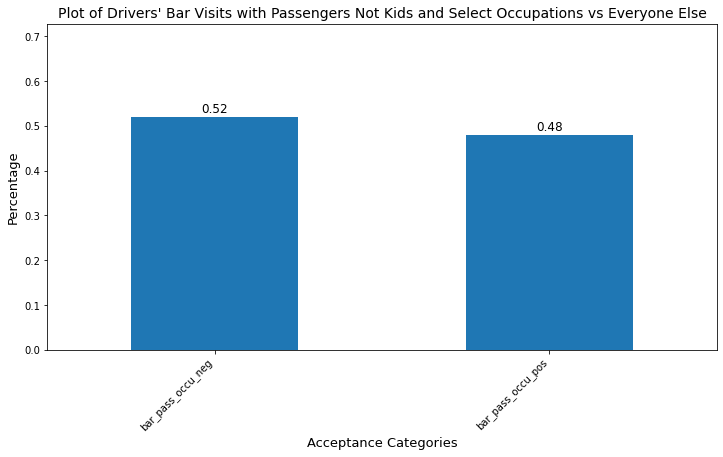

In [97]:
#get bar coupons only
df_bar_coupons = dts.query("coupon == 'Bar'") 

df_bar_coupons.convert_dtypes().dtypes

#get only accepted bar coupons
df_accepted_bar_coupons = df_bar_coupons.loc[df_bar_coupons["Y"] == 1]
df_accepted_bar_coupons

#remove null values
df_accepted_bar_coupons2 = df_accepted_bar_coupons[df_accepted_bar_coupons["Bar"].notna()]
df_accepted_bar_coupons2 = df_accepted_bar_coupons2[df_accepted_bar_coupons2["passanger"].notna()]
df_accepted_bar_coupons2 = df_accepted_bar_coupons2[df_accepted_bar_coupons2["occupation"].notna()]
df_accepted_bar_coupons2



#function to iterate through the dataframe 
def iter_df_bar_pass_occu_accepted(df):
    ifilter = ["1~3","4~8","gt8"]#filter those that go to bar
    pass_filter = ["Alone","Friend(s)","Partner"] #filter out those with passangers not kids
    occu_filter = ["Farming", "Fishing", "Forestry"] #filter out those with occupation not those listed
    
    df["occu_separation"] = np.NaN
    
    for idx, row in df.iterrows():
        if  df.loc[idx,'Bar'] in ifilter and df.loc[idx,'passanger'] in pass_filter and df.loc[idx, 'occupation'] not in occu_filter:
            df.loc[idx,'occu_separation'] = "bar_pass_occu_pos"
        else:
            df.loc[idx,'occu_separation'] = "bar_pass_occu_neg"
            
    return df

#filter using the necessary parameters
df_accepted_bar_coupons2 = iter_df_bar_pass_occu_accepted(df_accepted_bar_coupons2)


df_accepted_bar_coupons2["occu_separation"].value_counts(dropna=False)

#assign the groups to a variable
acceptance_occu = df_accepted_bar_coupons2["occu_separation"].value_counts(dropna=False, normalize=True)

#plot the variable
fig = acceptance_occu.plot.bar(figsize=(12,6))

#assign margin to the plot and rotate the x-axis ticks
plt.margins(0.4)
plt.xticks(rotation=45, ha='right')

#label the bars in the bar plot
for index,value in enumerate(acceptance_occu):
    fig.annotate(format(value, '.2f'),
                   (index, value), 
                    ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')

#label the axis and the title
fig.set_ylabel("Percentage", fontsize=13)
fig.set_xlabel('Acceptance Categories', fontsize=13)
fig.set_title(f"Plot of Drivers' Bar Visits with Passengers Not Kids and Select Occupations vs Everyone Else", fontsize=14)
acceptance_occu
#df_barcoupons_accepted2 = df_barcoupons_accepted2[df_barcoupons_accepted2['passanger'].isin(filter_passanger)]
#df_barcoupons_accepted2["passanger"].value_counts(dropna=False)
#df_bar_coupons_3orfewer_total = df_bar_coupons_3_or_fewer.append(df_bar_coupons_less1).append(df_bar_coupons_never)

#df_accepted_bar_coupons2["passanger"].value_counts(dropna=False)
#df_accepted_bar_coupons2["Bar"].value_counts(dropna=False)

### 8. Compare the acceptance rates between those passengers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 

### Solution
- There is a 59% acceptance rate among those who met the criteria
- There is a 41% acceptance rate among those who did not the meet the criteria




multiple_all_else    0.592365
multiple_pos         0.407635
Name: multiple_separation, dtype: float64

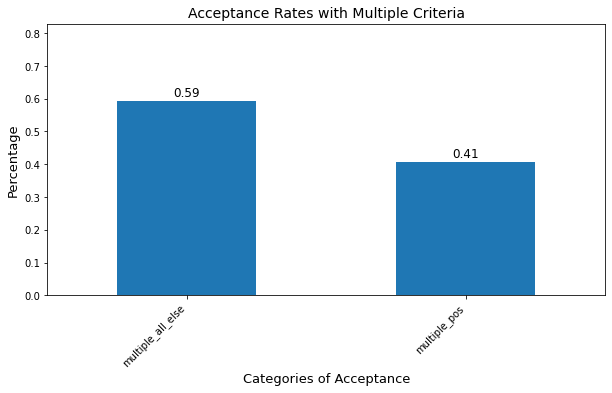

In [98]:
#get bar coupons only
df_bar_coupons = dts.query("coupon == 'Bar'") 

df_bar_coupons.convert_dtypes().dtypes

#get only accepted bar coupons
df_accepted_bar_coupons = df_bar_coupons.loc[df_bar_coupons["Y"] == 1]
df_accepted_bar_coupons

#remove null values
df_accepted_bar_coupons2 = df_accepted_bar_coupons[df_accepted_bar_coupons["Bar"].notna()]
df_accepted_bar_coupons2 = df_accepted_bar_coupons2[df_accepted_bar_coupons2["passanger"].notna()]
df_accepted_bar_coupons2 = df_accepted_bar_coupons2[df_accepted_bar_coupons2["maritalStatus"].notna()]
df_accepted_bar_coupons2 = df_accepted_bar_coupons2[df_accepted_bar_coupons2["age"].notna()]
df_accepted_bar_coupons2 = df_accepted_bar_coupons2[df_accepted_bar_coupons2["RestaurantLessThan20"].notna()]


#function to iterate through the dataframe
def iter_df_bar_pass_occu_accepted_detailed(df):
    bar_filter = ["1~3","4~8","gt8"] #filter out those that go to bar more times
    pass_filter = ["Alone","Friend(s)","Partner"] #filter out passangers without kids
    occu_filter = ["Farming", "Fishing", "Forestry"] #filter out occupation not those listed
    income_filter = ["$25000 - $37499","$12500 - $24999","$37500 - $49999","Less than $12500"] #filter out the pay grades
    crestau_filter = ["4~8","gt8"] #filter out the restaurant goaers above 4
    mstatus_filter = ["Single","Married partner","Unmarried partner","Divorced"] #filter out the marital status
     
    #create additional column
    df["multiple_separation"] = np.NaN
    
    #iterate through the rows and select using the above filter parameters
    for idx, row in df.iterrows():
        if  (df.loc[idx,'Bar'] in bar_filter and df.loc[idx,'passanger'] in pass_filter and df.loc[idx, 'maritalStatus'] not in mstatus_filter) or (df.loc[idx,'Bar'] in bar_filter and df.loc[idx,'age'] < 30) or (df.loc[idx,'RestaurantLessThan20'] in crestau_filter and df.loc[idx,'income'] in income_filter):
            df.loc[idx,'multiple_separation'] = "multiple_pos"
        else:
            df.loc[idx,'multiple_separation'] = "multiple_all_else"
            
    return df


#filter out using the function defined above
df_accepted_bar_coupons2 = iter_df_bar_pass_occu_accepted_detailed(df_accepted_bar_coupons2)

#get the value counts categories of the new column
df_accepted_bar_coupons2["multiple_separation"].value_counts(dropna=False)

#assign the groups to a variable
acceptance_multiple = df_accepted_bar_coupons2["multiple_separation"].value_counts(dropna=False, normalize=True)

#plot the variable
fig = acceptance_multiple.plot.bar(figsize=(10,5))

#assign margin to the plot and rotate the x-axis ticks
plt.margins(0.4)
plt.xticks(rotation=45, ha='right')

#label the bars in the bar plot
for index,value in enumerate(acceptance_multiple):
    fig.annotate(format(value, '.2f'),
                   (index, value), 
                    ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')

#set the labels and the title
fig.set_ylabel("Percentage", fontsize=13)
fig.set_xlabel('Categories of Acceptance', fontsize=13)
fig.set_title(f"Acceptance Rates with Multiple Criteria", fontsize=14)
acceptance_multiple
#df_accepted_bar_coupons2["maritalStatus"].value_counts(dropna=False)

### 9.  Based on these observations, what do you hypothesize about passengers who accepted the bar coupons?

#### Null Hypothesis
- H0: Probability of accepting the bar coupons and not accepting the bar coupons are equal i.e.μ1 = μ2, 


#### Alternative Hypothesis
- H1: Probability of accepting the bar coupons and not accepting the bar coupons are not equal i.e.μ1 ≠ μ2, 


In [50]:
df_accepted_bar_coupons2
mul_pos = df_accepted_bar_coupons2.query("multiple_separation == 'multiple_pos'")["age"].head(200)
mul_all_else = df_accepted_bar_coupons2.query("multiple_separation == 'multiple_all_else'")["age"].head(200)

from scipy import stats

alpha = 0.05

t_value,p_value=stats.ttest_ind(mul_pos,mul_all_else)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))
print('p-value for two tailed test is %f'%p_value)

if p_value<=alpha:

    print('Conclusion','n','Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that 
    the Probability of accepting the bar coupon and not accepting the bar coupon are not equal i.e., 
    μ1 ≠ μ2 at %.2f level of significance.'''%alpha)

else:

    print('Conclusion','n','Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0.''')






Test statistic is -8.785142
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that 
    the Probability of accepting the bar coupon and not accepting the bar coupon are not equal i.e., 
    μ1 ≠ μ2 at 0.05 level of significance.


### Independent Investigation

#### Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### Get the coupons for the coffee house

In [51]:
#df_bar_coupons = dts.groupby("coupon").size()
df_coffee_house_coupons = dts.query("coupon == 'Coffee House'")
df_coffee_house_coupons.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,<NA>,never,never,<NA>,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,<NA>,never,never,<NA>,4~8,1~3,1,1,0,0,1,0


### Proportion of Coffee House coupons accepted
- 50% of Coffee House coupons were accepted
- 50% of Coffee House coupons were not accepted

Text(0.5, 1.0, 'Proportion of Coffee House Coupons Accepted vs Not Accepted')

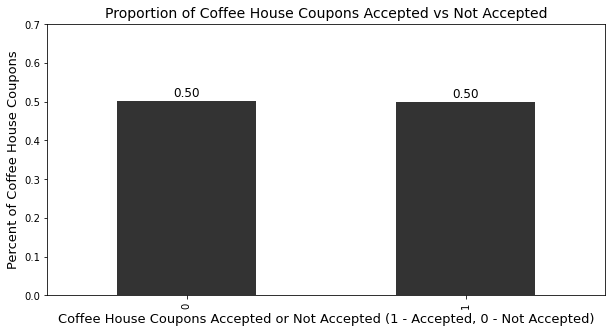

In [99]:
#Proportion of Coffee House coupons that were accepted
df_coffee_house_coupons_accepted = df_coffee_house_coupons['Y'].value_counts(normalize=True)

#plot the bar plot
fig = df_coffee_house_coupons_accepted.plot(kind='bar', figsize=(10,5), color='k', alpha=0.8)

#set the margins
plt.margins(0.4)

for index,value in enumerate(df_coffee_house_coupons_accepted):
    fig.annotate(format(value, '.2f'),
                   (index, value), 
                    ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')

#set the labels and the title
fig.set_ylabel("Percent of Coffee House Coupons", fontsize=13)
fig.set_xlabel('Coffee House Coupons Accepted or Not Accepted (1 - Accepted, 0 - Not Accepted)', fontsize=13)
fig.set_title(f"Proportion of Coffee House Coupons Accepted vs Not Accepted", fontsize=14)

#df_coffee_house_coupons

### Compare the acceptance rate between those who went to a Coffee House 3 or fewer times a month to those who went more.

- 74% acceptance rate among people who went to a coffee house 3 or fewer times a month
- 26% acceptance rate among people who went to a coffee house more times within a month

Text(0.5, 1.0, 'Acceptance rate Between Fewer Than 3 visitors and the rest')

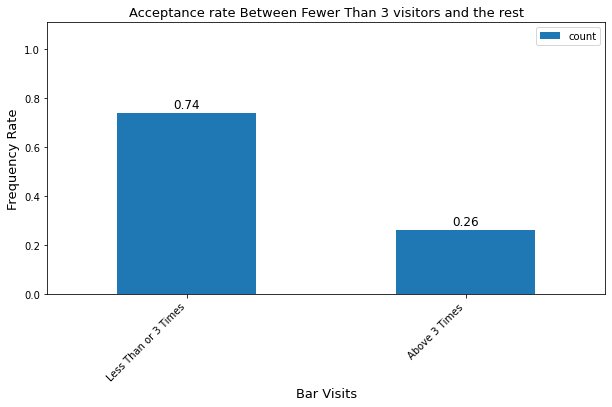

In [100]:
#get bar coupons only
df_coffee_house_coupons = dts.query("coupon == 'Coffee House'") 

df_coffee_house_coupons.convert_dtypes().dtypes

#get only accepted bar coupons
df_accepted_coffee_house_coupons = df_bar_coupons.loc[df_bar_coupons["Y"] == 1]
df_accepted_coffee_house_coupons

#remove null values
df_accepted_coffee_house_coupons["CoffeeHouse"].value_counts(dropna=False)

df_accepted_coffee_house_coupons2 = df_accepted_coffee_house_coupons[df_accepted_coffee_house_coupons["CoffeeHouse"].notna()]
df_accepted_coffee_house_coupons2["CoffeeHouse"].value_counts(dropna=False)



#compare acceptance rate between those who went to bar 3 or fewer times a month
#to those who went more.
df_coffee_house_coupons_3_or_fewer = df_accepted_coffee_house_coupons2.query("CoffeeHouse == '1~3'")
df_coffee_house_coupons_less1 = df_accepted_coffee_house_coupons2.query("CoffeeHouse == 'less1'")
df_coffee_house_coupons_never = df_accepted_coffee_house_coupons2.query("CoffeeHouse == 'never'")
df_coffee_house_coupons_4to8 = df_accepted_coffee_house_coupons2.query("CoffeeHouse == '4~8'")
df_coffee_house_coupons_gt8 = df_accepted_coffee_house_coupons2.query("CoffeeHouse == 'gt8'")

#get those that go to coffee house 3 or fewer times
df_coffee_house_coupons_3orfewer_total = df_coffee_house_coupons_3_or_fewer.append(df_coffee_house_coupons_less1).append(df_coffee_house_coupons_never)

#get all else that go to coffee house
df_coffee_house_coupons_higherthan3_total = df_coffee_house_coupons_4to8.append(df_coffee_house_coupons_gt8)

#get count of those that go to coffee house fewer or 3 times
three_or_fewer = df_coffee_house_coupons_3orfewer_total["CoffeeHouse"].count()

#get count of all else
above3 = df_coffee_house_coupons_higherthan3_total["coupon"].count()

#get the total
total = three_or_fewer + above3

#get rate of those that go to coffee house 3 or fewer times
three_or_fewer_rate = three_or_fewer/total

#get the rate for all else
above3_rate = above3/total

#create a data frame
cvisit_data = {
    "category": ["Less Than or 3 Times","Above 3 Times"],
    "count": [three_or_fewer_rate,above3_rate]
}

coffee_house_visits = pd.DataFrame(cvisit_data).reset_index()
coffee_house_visits.columns = ["index", "category", "count"]
coffee_house_visits = coffee_house_visits[["category", "count"]]
coffee_house_visits.set_index("category")


#plot the bar plot
fig = coffee_house_visits.plot.bar(x="category", figsize=(10,5))
#set margins and the xlabels and rotation
plt.margins(0.5)
plt.xticks(rotation=45, ha='right')

#label the bars of the bar plot
for index,value in enumerate(coffee_house_visits["count"]):
    fig.annotate(format(value, '.2f'),
                   (index, value), 
                    ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')

#set labels and title        
fig.set_ylabel("Frequency Rate", fontsize=13)
fig.set_xlabel('Bar Visits', fontsize=13)
fig.set_title(f"Acceptance rate Between Fewer Than 3 visitors and the rest", fontsize=13)

### Compare the acceptance rate between drivers who go to a Coffee House more than once a month and are over the age of 25 to the all others.  Is there a difference?
- 305 drivers above the age of 25 visit a bar more than once a month while 509 visit less than once
- 37% acceptance rate by drivers who visit more than once
- 63% acceptance rate by all others
- There is a difference of 204 which is a normalized 26%

Text(0.5, 1.0, 'Population of Coffee House Visits for drivers above 25 vs Everyone Else')

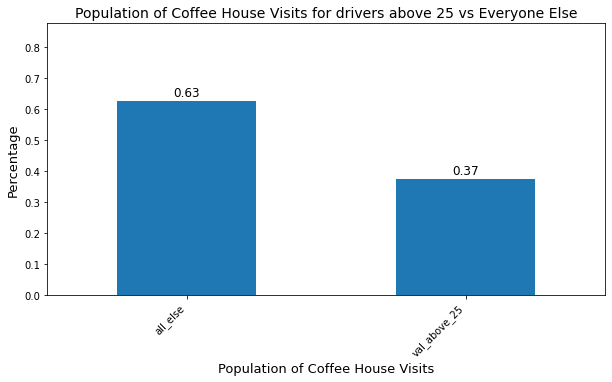

In [101]:
#function to convert 50plus category to 50 in the age column
def convert_to50(val):
    new_val = 50
    
    if val == "50plus":
        return new_val
    else:
        return val
    
#function to convert below21 category to 20 in the age column
def convert_to20(val):
    new_val = 20
    
    if val == "below21":
        return new_val
    else:
        return val
    

#convert 50plus and below 21 to 50 and 20 respectively
dts["age"] = dts["age"].apply(convert_to50)
dts["age"] = dts["age"].apply(convert_to20)



#convert age column to numeric
dts["age"] = pd.to_numeric(dts["age"])




#get all the Bar coupons
df_coffeehousecoupons = dts.query("coupon == 'Bar'")

#get the accepted bar coupons
df_coffeehousecoupons_accepted = df_coffeehousecoupons.loc[df_coffeehousecoupons["Y"] == 1]



#function to filter out those that go to coffee house more than once a month
def iter_df_coffeehousecoupons_accepted(df):
    filters = ["1~3","4~8","gt8"]
    df["visits_25"] = np.NaN
    
    #iterate through the dataframe and apply the filter
    for idx, row in df.iterrows():
        if  df.loc[idx,'age'] > 25 and df.loc[idx,'CoffeeHouse'] in filters:
            df.loc[idx,'visits_25'] = "val_above_25"
        else:
            df.loc[idx,'visits_25'] = "all_else"
            
    return df


#select only non-empty fields
df_coffeehousecoupons_accepted = df_coffeehousecoupons_accepted[df_coffeehousecoupons_accepted["CoffeeHouse"].notna()]

df_coffeehousecoupons_accepted2 = iter_df_coffeehousecoupons_accepted(df_coffeehousecoupons_accepted)

#assign the groups to a variable
coffeehouse_visits_above25 = df_coffeehousecoupons_accepted2["visits_25"].value_counts(dropna=False, normalize=True)

#plot the variable
fig = coffeehouse_visits_above25.plot.bar(figsize=(10,5))

#assign margin to the plot and rotate the x-axis ticks
plt.margins(0.4)
plt.xticks(rotation=45, ha='right')

#create the bars in the bar plot
for index,value in enumerate(coffeehouse_visits_above25):
    fig.annotate(format(value, '.2f'),
                   (index, value), 
                    ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')

#set the labels and title
fig.set_ylabel("Percentage", fontsize=13)
fig.set_xlabel('Population of Coffee House Visits', fontsize=13)
fig.set_title(f"Population of Coffee House Visits for drivers above 25 vs Everyone Else", fontsize=14)

### Construct Null and Alternative Hypothesis 

#### Null Hypothesis
- H0: Probability of going to coffee house being above 25 years of age and being less than 25 years are equal i.e.μ1 = μ2, 

#### Alternative Hypothesis
- H1: Probability of going to coffee house being above 25 years of age and being less than 25 years are not equal i.e.μ1 ≠ μ2, 

In [34]:
df_coffeehousecoupons_accepted2
cabove_25 = df_coffeehousecoupons_accepted2.query("visits_25 == 'val_above_25'")["age"].head(200)
call_else = df_coffeehousecoupons_accepted2.query("visits_25 == 'all_else'")["age"].head(200)

In [35]:
from scipy import stats

alpha = 0.05

ct_value,cp_value=stats.ttest_ind(cabove_25,call_else)

print('Test statistic is %f'%float("{:.6f}".format(ct_value)))
print('p-value for two tailed test is %f'%cp_value)

if cp_value<=alpha:

    print('Conclusion','n','Since p-value(=%f)'%cp_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that 
    the Probability of going to coffee house being above 25 years of age and being less than 25 years are not equal i.e., 
    μ1 ≠ μ2 at %.2f level of significance.'''%alpha)

else:

    print('Conclusion','n','Since p-value(=%f)'%cp_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0.''')



Test statistic is 5.715766
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that 
    the Probability of going to coffee house being above 25 years of age and being less than 25 years are not equal i.e., 
    μ1 ≠ μ2 at 0.05 level of significance.
